<a href="https://colab.research.google.com/github/pandeyshishir/Course/blob/master/Assignment_HousingAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
# First thing we do is import all required items - up to basic linear regression
# we will come back and add stuff for cross validation and advanced regression stuff.

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

The first thing we need to do is read the input data. After reading the input 
data we will identify the things in following order:


1.   First we will identify all the apparent numeric and non-numeric predictors.
2.   Next we will look at the target variable and identify if there it is normal or has any skew or kurtosis (this concept was not taught in the course, but in stats books it is explained).
3.   Next we will look at identifying any numeric columns which are really categorical. 
4.   We will then identify the number of nulls or missisng values across all columns and deal with them either by removing them or interpolating. 
5.   We will then check the correlation between SalePrice our target and all the other predictors, as well as we'll plot the graphs for SalePrice vs predictor to view relation visually.
6.   We will also try to identify which predictor variables have high correlation among themselves and replace them with one of them. 
7.   We will then perform one-hot encoding on categorical variables. 
8.   We will perform the univariate analysis - looking at outliers, looking at normality of data and then move to minor bivariate analysis. (actually we'll do it right after corr). 
9.   We will perform first round or multi-linear regression. We'll obtain the R^2 value. 
10.  We will next perform Ridge regression and obtain R^2 value. 
11.  We will next perform Lasso regression and obtain R^2 value. 



In [72]:
original_data = pd.read_csv("./train.csv")
original_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
print(original_data.columns)
print("Total number of columns = ", len(original_data.columns))

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

ID is a useless column, let us drop it right at the beginning.

In [74]:
original_data = original_data.drop('Id', axis=1)
original_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [75]:
#Now let us identify all non-numeric columns and hold them separately
non_numeric_data = original_data.select_dtypes(exclude=np.number)
non_numeric_data.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

Now let us look at distinct unique values that exist in these non-numeric columns.

In [76]:
# Let us look at all the unique values that each of these columns contains and we do not care where the unique value is only 1.
# The number of unique values must be > 1 because if all values are same it has no impact on target variable. 
unique_values = {col: non_numeric_data[col].unique() for col in non_numeric_data if len(non_numeric_data[col].unique()) > 1}
print(unique_values)

# Get column names as list excluding columns with only one unique value
column_names = [col for col in non_numeric_data.columns if len(non_numeric_data[col].unique()) > 1]
print(column_names)

{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object), 'Street': array(['Pave', 'Grvl'], dtype=object), 'Alley': array([nan, 'Grvl', 'Pave'], dtype=object), 'LotShape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object), 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object), 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object), 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object), 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object), 'Neighborhood': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object), 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object), 'Condition2': array(['Norm', 'Artery', 'RRNn', 'Feed

In [77]:
# Let us now identify the missing values across all variables. 
original_data[original_data.columns[original_data.isnull().any()]].isnull().sum() * 100 / original_data.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

I think we can drop the columns with greater than 30% null values since interpolating that many values is likely to give an incorrect analysis. 
Additionally, since there are so many null values or missing values their
impact on the target variable is likely to be miniscule.

In [78]:
sans_null_original_data = original_data.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu', 'Electrical'], axis=1)
sans_null_original_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [79]:
null_percents = sans_null_original_data[sans_null_original_data.columns[sans_null_original_data.isnull().any()]].isnull().sum() * 100 / sans_null_original_data.shape[0]
print(null_percents)

LotFrontage     17.739726
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64


In order to interpolate we need to know if any of these are categorical vs numercial columns. 

In [80]:
# Find columns with null values
null_columns = sans_null_original_data.columns[sans_null_original_data.isnull().any()].tolist()

# From those, find the non-numeric columns, I am not very sure how to use select_dtypes here so
# using the list comprehension
non_numeric_null_columns = [col for col in null_columns if sans_null_original_data[col].dtype != np.number]
print(non_numeric_null_columns)



['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


<ipython-input-80-005822f111b6>:6: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  non_numeric_null_columns = [col for col in null_columns if sans_null_original_data[col].dtype != np.number]


In [81]:
#Let us do a quick info on current data.
sans_null_original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [82]:
# Now let us see which of the list of numeric columns could be categories
# We are choosing 12 because we know that at least one of the columns is months.
n = 12 
potential_categorical_cols = [{
    'column': col,
    'unique_count': sans_null_original_data[col].nunique(),
    'unique_values': sans_null_original_data[col].unique()
} for col in sans_null_original_data.select_dtypes(include=[np.number]).columns if sans_null_original_data[col].nunique() <= n]

# print the result
for item in potential_categorical_cols:
    print(f"Column: {item['column']}")
    print(f"Unique count: {item['unique_count']}")
    print(f"Unique values: {item['unique_values']}\n")



Column: OverallQual
Unique count: 10
Unique values: [ 7  6  8  5  9  4 10  3  1  2]

Column: OverallCond
Unique count: 9
Unique values: [5 8 6 7 4 2 3 9 1]

Column: BsmtFullBath
Unique count: 4
Unique values: [1 0 2 3]

Column: BsmtHalfBath
Unique count: 3
Unique values: [0 1 2]

Column: FullBath
Unique count: 4
Unique values: [2 1 3 0]

Column: HalfBath
Unique count: 3
Unique values: [1 0 2]

Column: BedroomAbvGr
Unique count: 8
Unique values: [3 4 1 2 0 5 6 8]

Column: KitchenAbvGr
Unique count: 4
Unique values: [1 2 3 0]

Column: TotRmsAbvGrd
Unique count: 12
Unique values: [ 8  6  7  9  5 11  4 10 12  3  2 14]

Column: Fireplaces
Unique count: 4
Unique values: [0 1 2 3]

Column: GarageCars
Unique count: 5
Unique values: [2 3 1 0 4]

Column: PoolArea
Unique count: 8
Unique values: [  0 512 648 576 555 480 519 738]

Column: MoSold
Unique count: 12
Unique values: [ 2  5  9 12 10  8 11  4  1  7  3  6]

Column: YrSold
Unique count: 5
Unique values: [2008 2007 2006 2009 2010]



It is evident from this output that:


1.   All of these are categorical variables including selling year, remodeled year, built year etc. However most of these are ordered categorical variables so we should use LabelEncoding or just convert the values into ordered categorical values (let's try second thing first)
2.   List item





In [83]:
for col_dict in potential_categorical_cols:
    col = col_dict['column']
    sans_null_original_data[col] = pd.Categorical(sans_null_original_data[col], ordered=True)

for item in potential_categorical_cols:
    print(f"Column: {item['column']}")
    print(f"Unique count: {item['unique_count']}")
    print(sans_null_original_data[item['column']])

Column: OverallQual
Unique count: 10
0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]
Column: OverallCond
Unique count: 9
0       5
1       8
2       5
3       5
4       5
       ..
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: category
Categories (9, int64): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]
Column: BsmtFullBath
Unique count: 4
0       1
1       0
2       1
3       1
4       1
       ..
1455    0
1456    1
1457    0
1458    1
1459    1
Name: BsmtFullBath, Length: 1460, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]
Column: BsmtHalfBath
Unique count: 3
0       0
1       1
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: BsmtHalfBath, Length: 1460, dtype: category
Categories (3, int64): [0 < 1 < 2]
Column: FullBath
Unique c

In [84]:
#Now let us try to impute the values for categorical variables. 
#In order to do that we'll use SimpleImputer, but we'll have it work only on the categorical data.
# columns with null values
null_columns = sans_null_original_data.columns[sans_null_original_data.isnull().any()]
# separating categorical and numeric columns
categorical_columns_with_null = [col for col in null_columns if sans_null_original_data[col].dtype == 'object']
numeric_columns_with_null = [col for col in null_columns if sans_null_original_data[col].dtype != 'object']

print("Categorical columns with null values: ", categorical_columns_with_null)
print("Numeric columns with null values: ", numeric_columns_with_null)

# Now let us apply simple imputer for categorical columns
from sklearn.impute import SimpleImputer
cat_cols = [col for col in sans_null_original_data.columns if sans_null_original_data[col].dtype == 'object']
imputer = SimpleImputer(strategy='most_frequent')
sans_null_original_data[cat_cols] = imputer.fit_transform(sans_null_original_data[cat_cols])

# Convert the numerical missing values in the columns to mean value (not a great idea but sure why not)
# Fill numeric columns with the mean value of the column (I love .apply())
sans_null_original_data[numeric_columns_with_null] = sans_null_original_data[numeric_columns_with_null].apply(lambda col: col.fillna(col.mean()))
null_percent = sans_null_original_data[sans_null_original_data.columns[sans_null_original_data.isnull().any()]].isnull().sum() * 100 / sans_null_original_data.shape[0]
print(null_percent)
# After this there are no null values in this datframe


Categorical columns with null values:  ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
Numeric columns with null values:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
Series([], dtype: float64)


In [85]:
# Let us check the shape of the data and check the categorical variables
sans_null_original_data.shape
sans_null_original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   int64   
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   Utilities      1460 non-null   object  
 8   LotConfig      1460 non-null   object  
 9   LandSlope      1460 non-null   object  
 10  Neighborhood   1460 non-null   object  
 11  Condition1     1460 non-null   object  
 12  Condition2     1460 non-null   object  
 13  BldgType       1460 non-null   object  
 14  HouseStyle     1460 non-null   object  
 15  OverallQual    1460 non-null   category
 16  OverallCond    1460 non-null   category
 17  YearBuilt      1460 non-null   in

In this set up there are 51 categorical variables and there are 23 numeric variables (some of which may still be categorical but we'll see that in a bit).

<ipython-input-86-5db0c908bedf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sans_null_original_data['SalePrice'], fit=norm, kde=False)


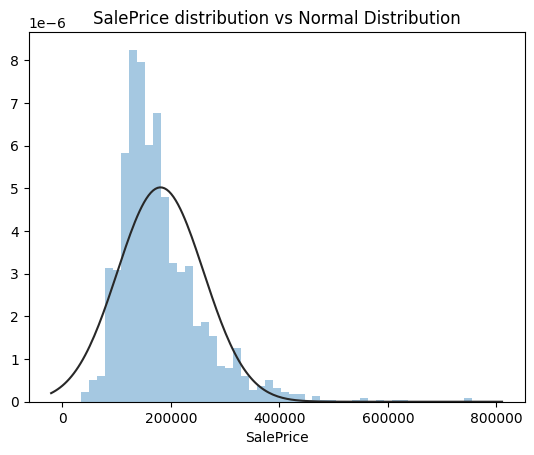

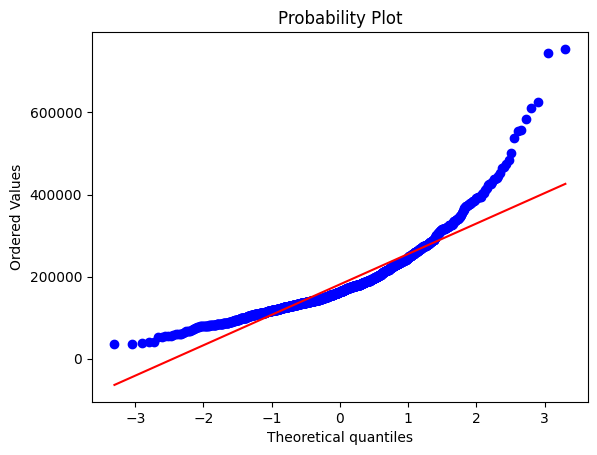

In [86]:
# We next move on to viewing how our target variable looks like, by plotting it,
# then we'll see if we need to find and fix for skew and kurtosis. 
sans_null_original_data['SalePrice'].describe()
from scipy.stats import norm
sns.distplot(sans_null_original_data['SalePrice'], fit=norm, kde=False)
plt.title('SalePrice distribution vs Normal Distribution')

fig = plt.figure()
res = stats.probplot(sans_null_original_data['SalePrice'], plot=plt)
plt.show()

So this doesn't look very normal, let's calculate skew and kurtosis, if skew is belongs to (-inf, -1) U (1, +inf) then it is highly skewed and similarly for
kurtosis we need to see how close it is to 3 (which is the value for normal distribution)

In [87]:
from scipy.stats import skew, kurtosis
saleprice_skew = skew(sans_null_original_data['SalePrice'])
print(f'Skewness of SalePrice: {saleprice_skew}')

saleprice_kurtosis = kurtosis(sans_null_original_data['SalePrice'])
print(f'Kurtosis of SalePrice: {saleprice_kurtosis}')


Skewness of SalePrice: 1.880940746034036
Kurtosis of SalePrice: 6.509812011089439


It is clear that we have high positive skew. We will use a strategy of transforming this data using lg(1+x) transformation, normally this removes the skew. The issue with this will be whatever model we train, once we've done the predictions using this modified value, we'll need to convert the data into the inverse of lg to get the actual values, not that it really matters much. 

<ipython-input-88-1cda6b605925>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sans_null_original_data['SalePrice'], fit=norm)


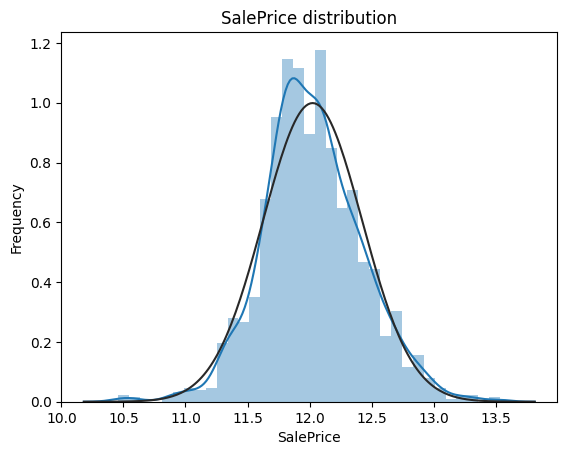

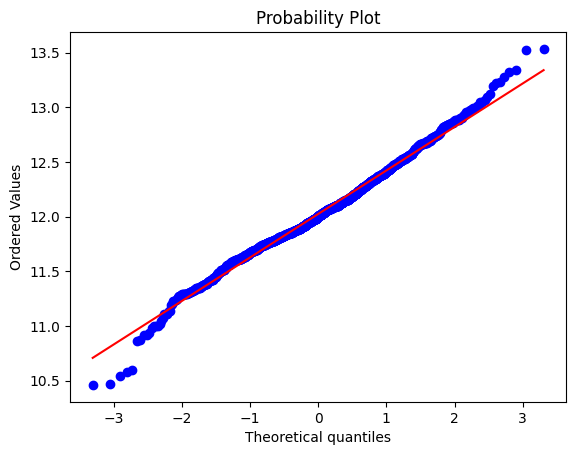

Skewness: 0.121347
Kurtosis: 0.809519


In [88]:
# Apply log transformation using numpy's log1p function. Pandas and Numpy make things so easy.
sans_null_original_data['SalePrice'] = np.log1p(sans_null_original_data['SalePrice'])

# Now we plot it again and see the fit. 
sns.distplot(sans_null_original_data['SalePrice'], fit=norm)
#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# Get also the QQ-plot as we got earlier to see if it has straightened or not.
fig = plt.figure()
res = stats.probplot(sans_null_original_data['SalePrice'], plot=plt)
plt.show()

# Calculate skewness and kurtosis
print("Skewness: %f" % sans_null_original_data['SalePrice'].skew())
print("Kurtosis: %f" % sans_null_original_data['SalePrice'].kurt())


This is very nice, so from here on we'll only work with log transformed value. Now let us do some pairwise plots to see how things are looking wrt other variables. We'll first try to find out the most correlated items with salesprice
and then go about plotting them so first comes the heatmap for correlations.

<ipython-input-89-a39998bc5ec8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sans_null_original_data.corr()


<Axes: >

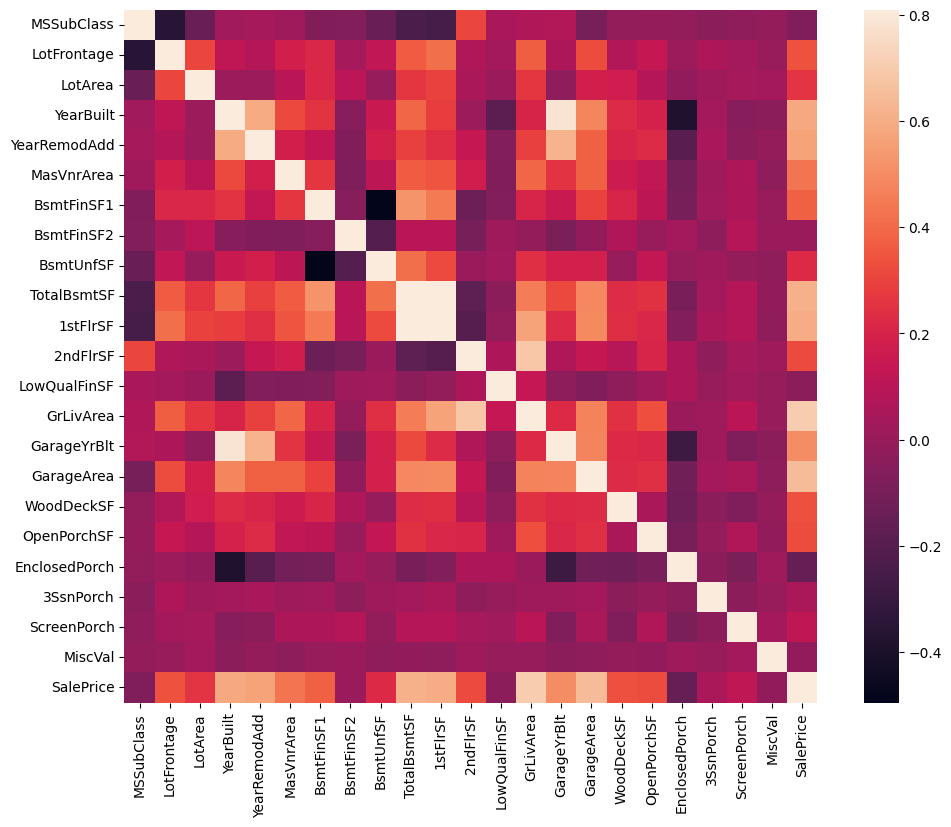

In [89]:
#correlation matrix
correlation_matrix = sans_null_original_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmax=.81, square=True)

In [90]:
# Perform one-way ANOVA for each non-numeric column and store the results in a list
non_numeric_data = sans_null_original_data.select_dtypes(exclude=np.number)
anova_results = [(column, *stats.f_oneway(*[sans_null_original_data.loc[sans_null_original_data[column] == category, 'SalePrice'] for category in sans_null_original_data[column].unique()])) for column in non_numeric_data.columns]

# Print out the results
for column, f_statistic, p_value in anova_results:
    print(f"For column {column}, F-statistic = {f_statistic}, p-value = {p_value}")
anova_results

For column MSZoning, F-statistic = 77.60760719600393, p-value = 1.0217365846800014e-59
For column Street, F-statistic = 4.814434444770553, p-value = 0.028379646829017106
For column LotShape, F-statistic = 46.7287852520591, p-value = 7.856719535731782e-29
For column LandContour, F-statistic = 12.767286297599949, p-value = 3.086153886545737e-08
For column Utilities, F-statistic = 0.23269025789394468, p-value = 0.6296085870536472
For column LotConfig, F-statistic = 8.692442396648316, p-value = 6.214548326154365e-07
For column LandSlope, F-statistic = 1.0830496097902718, p-value = 0.33883387690662126
For column Neighborhood, F-statistic = 79.52052611964812, p-value = 4.041200522496316e-243
For column Condition1, F-statistic = 8.037521352262097, p-value = 1.173445350388313e-10
For column Condition2, F-statistic = 2.527739721321658, p-value = 0.01382042663415218
For column BldgType, F-statistic = 15.211680808106525, p-value = 3.436707937564516e-12
For column HouseStyle, F-statistic = 23.5857

[('MSZoning', 77.60760719600393, 1.0217365846800014e-59),
 ('Street', 4.814434444770553, 0.028379646829017106),
 ('LotShape', 46.7287852520591, 7.856719535731782e-29),
 ('LandContour', 12.767286297599949, 3.086153886545737e-08),
 ('Utilities', 0.23269025789394468, 0.6296085870536472),
 ('LotConfig', 8.692442396648316, 6.214548326154365e-07),
 ('LandSlope', 1.0830496097902718, 0.33883387690662126),
 ('Neighborhood', 79.52052611964812, 4.041200522496316e-243),
 ('Condition1', 8.037521352262097, 1.173445350388313e-10),
 ('Condition2', 2.527739721321658, 0.01382042663415218),
 ('BldgType', 15.211680808106525, 3.436707937564516e-12),
 ('HouseStyle', 23.585774787895474, 1.6360138590318777e-30),
 ('OverallQual', 332.16695979346696, 0.0),
 ('OverallCond', 36.32346699125899, 9.272106378392981e-53),
 ('RoofStyle', 13.097309754404442, 1.70563396696766e-12),
 ('RoofMatl', 3.7806579000648055, 0.00045040769405408726),
 ('Exterior1st', 22.892276266208913, 1.053088865625582e-53),
 ('Exterior2nd', 19.9

This sort of tells us that Month Sold, Year Sold, Basement Finish Type 2, BsmtHalfBath, Land Slope etc are statistically insignificant and can be dropped so we'll do that since p-values are much greater than 0.05

In [91]:
sans_null_original_data.drop(['MoSold', 'YrSold', 'BsmtHalfBath', 'BsmtFinType2', 'LandSlope', 'Utilities'], axis=1, inplace=True)
sans_null_original_data.shape

(1460, 68)

In [92]:
#Next we perform one-hot encoding on the categorical data 
non_numeric_columns = sans_null_original_data.select_dtypes(include=['object', 'category'])
sans_null_original_data_encoded = pd.get_dummies(sans_null_original_data, columns=non_numeric_columns.columns)

sans_null_original_data_encoded.head()


,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,1976,1976,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,2000,2000,350.0,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


Mean Squared Error: 119548126.62399822
R2 Score: -694405052.2304095
(1168,)
(292,)


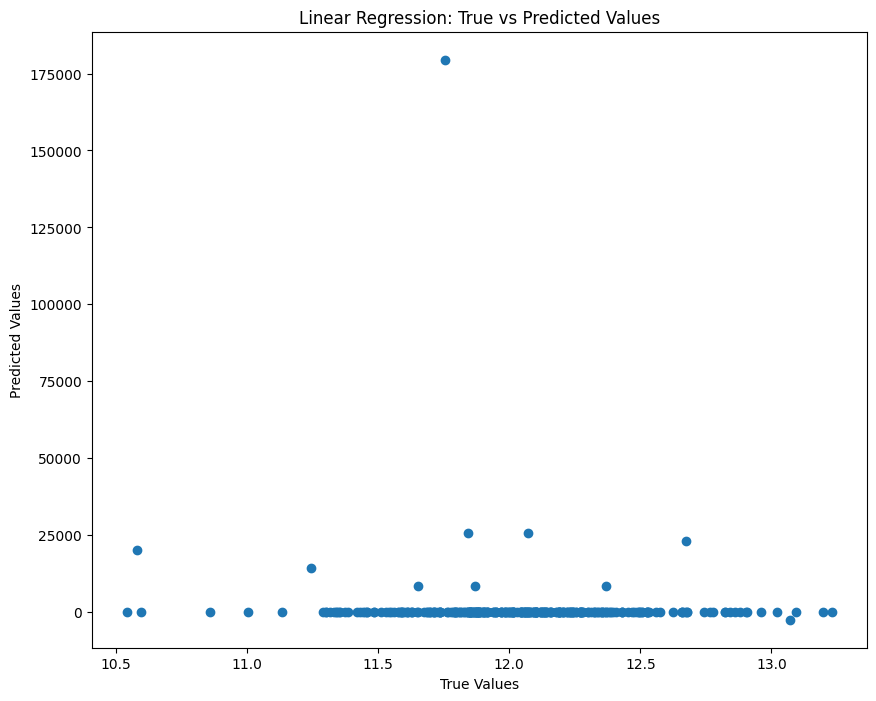

In [117]:
# Next we perform basic LinearRegression on this data for SalePrice and check the r^2 value.
X = sans_null_original_data_encoded.drop('SalePrice', axis=1)
y = sans_null_original_data_encoded['SalePrice']
# Do a test train split in 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Now create model and fit
lr = LinearRegression()
lr.fit(X_train, y_train)
# Do the predictions and get the MSE and R^2 value
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(y_train.shape)
print(y_pred.shape)

# Plotting y_train vs y_pred
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: True vs Predicted Values")
plt.show()

R^2 value is negative this can occur with overfitting, looking at the predicted value vs true value the plot looks very weird it should be a straight line at roughly 45-degrees slope from orign but it is the line x=0, don't really know how to interpret this. 

Best parameters:  {'alpha': 49.99999999999999}
Best score:  0.8625249818657423


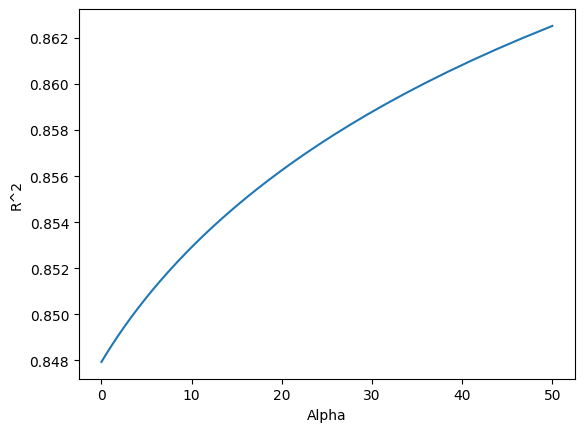

Text(0, 0.5, 'Predicted')

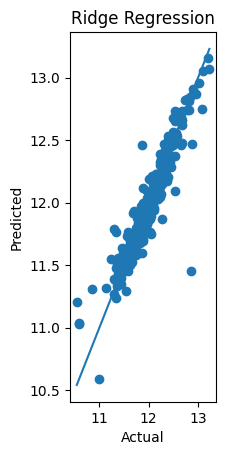

In [119]:
#First we apply Ridge regression with alpha values going from 0.001 to 50, and ensure that we normalize 
alpha_values = np.logspace(-4, np.log10(50), 200) # 200 specifies we are taking 200 points.
parameters = {'alpha': alpha_values}

# We are doing this to normalize the training and test data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge()

# Create the GridSearchCV object
ridge_cv = GridSearchCV(ridge, parameters, cv=5)

# Fit to the data
ridge_cv.fit(X_train_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters: ", ridge_cv.best_params_)
print("Best score: ", ridge_cv.best_score_)

# Plot R^2 against alpha
r2_scores = ridge_cv.cv_results_['mean_test_score']
plt.plot(alpha_values, r2_scores)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.show()

#Now we take the best alpha and do the prediction and plot y_test vs y_pred.
ridge = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge.fit(X_train_scaled, y_train)

# Making predictions
y_pred = ridge.predict(X_test_scaled)

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')


Best parameters:  {'alpha': 5.674331145583356}
Best score:  0.8652131455538168


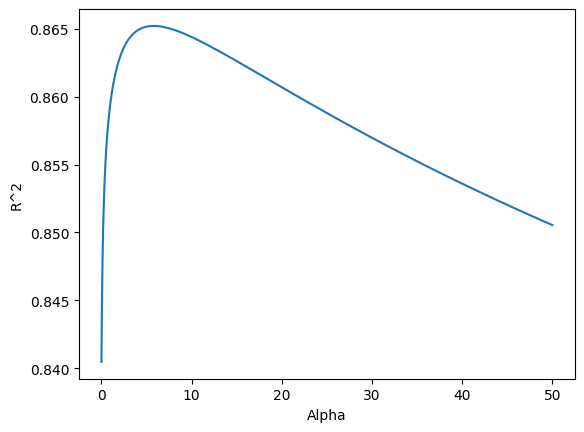

Text(0, 0.5, 'Predicted')

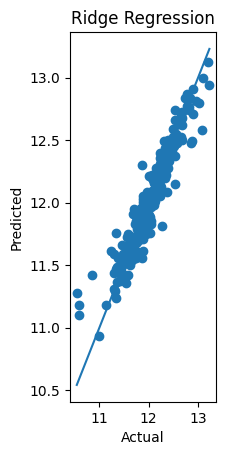

In [121]:
alpha_values = np.logspace(-4, np.log10(50), 200) # 200 specifies we are taking 200 points.
parameters = {'alpha': alpha_values}

ridge = Ridge()

# Create the GridSearchCV object
ridge_cv = GridSearchCV(ridge, parameters, cv=5)

# Fit to the data
ridge_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", ridge_cv.best_params_)
print("Best score: ", ridge_cv.best_score_)

# Plot R^2 against alpha
r2_scores = ridge_cv.cv_results_['mean_test_score']
plt.plot(alpha_values, r2_scores)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.show()

# Fitting the Ridge model
ridge = Ridge(alpha=ridge_cv.best_params_['alpha'])
ridge.fit(X_train, y_train)

# Making predictions
y_pred = ridge.predict(X_test)

# Plotting y_train vs y_pred
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
plt.title('Ridge Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')


Like what was expected the Ridge values are better than Linear Regression and between normalized vs non-normalized values normalized values are worse.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.764e-02, tolerance: 1.475e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.416e-02, tolerance: 1.475e-02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.518e-02, tolerance: 1.448e

Best parameters:  {'alpha': 0.00035004410179355095}
Best score:  0.866415178869383


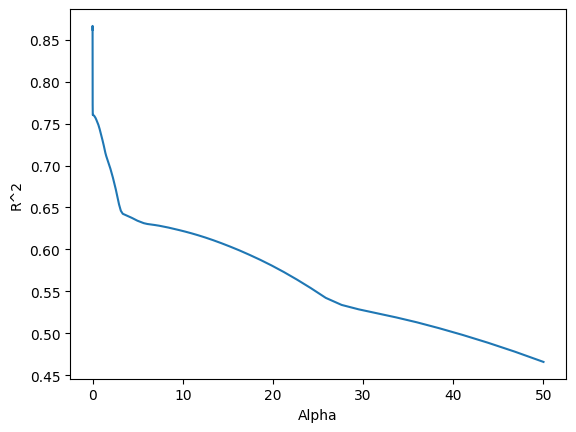

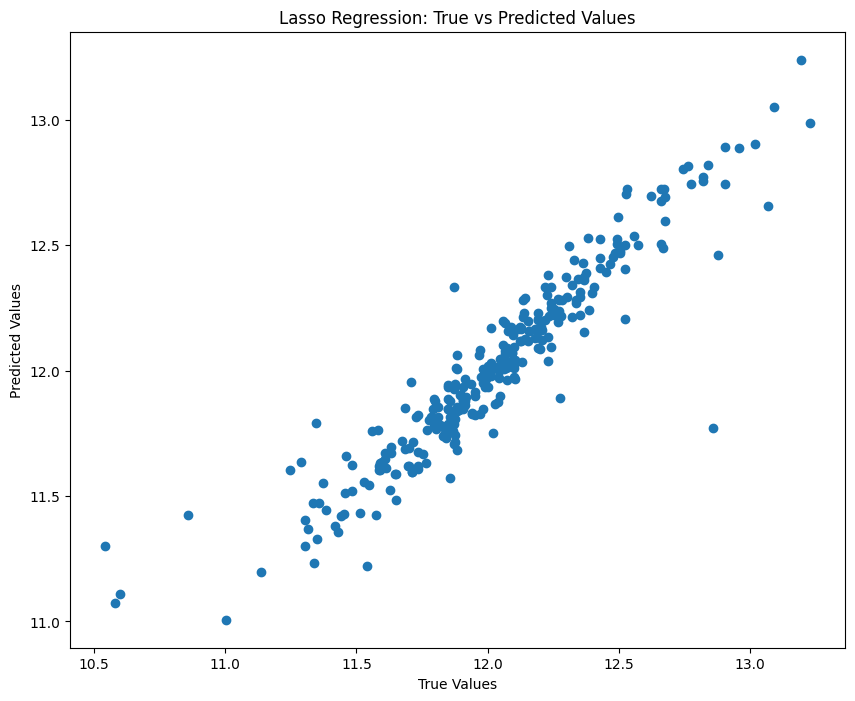

In [122]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, parameters, cv=5)

lasso_cv.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", lasso_cv.best_params_)
print("Best score: ", lasso_cv.best_score_)

# Plot R^2 against alpha
r2_scores = lasso_cv.cv_results_['mean_test_score']
plt.plot(alpha_values, r2_scores)
plt.xlabel('Alpha')
plt.ylabel('R^2')
plt.show()

# Fitting the Lasso model
lasso = Lasso(alpha=lasso_cv.best_params_['alpha'])
lasso.fit(X_train, y_train)

# Making predictions
y_pred = lasso.predict(X_test)

# Plotting y_train vs y_pred
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: True vs Predicted Values")
plt.show()


So by the looks of it, Lasso provides the best option with a 86.6 % match on predictions. The plot for y_test vs y_pred also looks pretty good, although unlike Ridge regression the fit line doesn't really pass through the origin which is weird. Let us also look now at the various coefficients and see which are the one's which Lasso eliminated.

In [127]:
# Feature names are simply the columns in X_train.
feature_names = X_train.columns
coefficients = lasso.coef_
#Now we create a dictionary from these two and print it out
coefficients_dictionary = dict(zip(feature_names, coefficients))
nonzero_coefficients_dictionary = {feature: coef for feature, coef in zip(feature_names, coefficients) if coef != 0}
import pprint
printer = pprint.PrettyPrinter(indent=2)
printer.pprint(coefficients_dictionary)
print("\n\nThe non-zero coefficients are as follows along with their values\n\n")
printer.pprint(nonzero_coefficients_dictionary)

{ '1stFlrSF': 0.0002430391077556401,
  '2ndFlrSF': 0.0002623406520503474,
  '3SsnPorch': 0.00022998886933057753,
  'BedroomAbvGr_0': 0.0,
  'BedroomAbvGr_1': -0.034012989670191604,
  'BedroomAbvGr_2': -0.0,
  'BedroomAbvGr_3': -0.0,
  'BedroomAbvGr_4': 0.0026116510253037027,
  'BedroomAbvGr_5': -0.04103142063026881,
  'BedroomAbvGr_6': 0.0,
  'BedroomAbvGr_8': 0.0,
  'BldgType_1Fam': 0.0,
  'BldgType_2fmCon': 0.0,
  'BldgType_Duplex': -0.0,
  'BldgType_Twnhs': -0.04578715583790883,
  'BldgType_TwnhsE': 0.0,
  'BsmtCond_Fa': -0.017456883854287522,
  'BsmtCond_Gd': 0.004618208268148681,
  'BsmtCond_Po': -0.0978004796697929,
  'BsmtCond_TA': 0.00037728721128048244,
  'BsmtExposure_Av': 0.0,
  'BsmtExposure_Gd': 0.06479793039104258,
  'BsmtExposure_Mn': -0.0,
  'BsmtExposure_No': -0.011348637130112993,
  'BsmtFinSF1': 9.639114866025142e-05,
  'BsmtFinSF2': 8.100102356968838e-05,
  'BsmtFinType1_ALQ': 0.004871237034056611,
  'BsmtFinType1_BLQ': 0.002609729366702364,
  'BsmtFinType1_GLQ': 0.